In [1]:
import os

# Define root directory
ROOT_DIR = "/content/data"

# Create directory if it doesn't exist
if not os.path.exists(ROOT_DIR):
    os.makedirs(ROOT_DIR)

print(f"Root directory created: {ROOT_DIR}")


Root directory created: /content/data


In [2]:
import requests
from tqdm import tqdm

# Dataset URL
DATASET_URL = "https://github.com/mrdbourke/pytorch-deep-learning/raw/refs/heads/main/data/pizza_steak_sushi.zip"
ZIP_PATH = os.path.join(ROOT_DIR, "pizza_steak_sushi.zip")

# Download dataset with progress bar
print("Downloading dataset...")
response = requests.get(DATASET_URL, stream=True)
total_size = int(response.headers.get('content-length', 0))
block_size = 1024  # 1 KB
progress_bar = tqdm(total=total_size, unit='B', unit_scale=True)

with open(ZIP_PATH, "wb") as f:
    for chunk in response.iter_content(block_size):
        progress_bar.update(len(chunk))
        f.write(chunk)
progress_bar.close()

print(f"Download completed: {ZIP_PATH}")


100%|██████████| 15.7M/15.7M [00:00<00:00, 24.6MB/s]

Download completed: /content/data/pizza_steak_sushi.zip


In [3]:
import zipfile

# Define extraction path
EXTRACT_PATH = os.path.join(ROOT_DIR, "pizza_steak_sushi")

# Extract the dataset
print("Extracting dataset...")
with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
    zip_ref.extractall(ROOT_DIR)

print(f"Dataset extracted to: {EXTRACT_PATH}")


Extracting dataset...
Dataset extracted to: /content/data/pizza_steak_sushi


In [4]:
from pathlib import Path

# Setup path to data folder
data_path = Path("data")


train_dir = data_path/ "train"
test_dir = data_path/ "test"

train_dir, test_dir

(PosixPath('data/train'), PosixPath('data/test'))

Image path: data/train/steak/225990.jpg
Image class: steak
Image size: (512, 384)


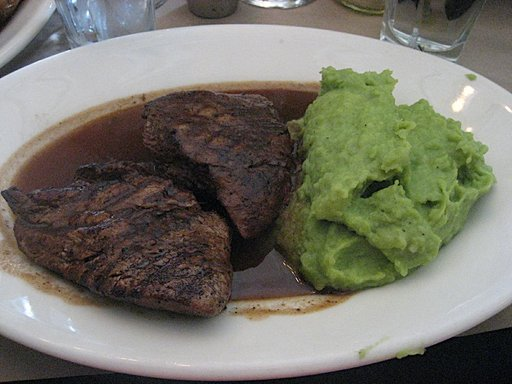

In [6]:
import random
from PIL import Image

#get all image path

image_path_list = list(data_path.glob("*/*/*.jpg"))

#random image

random_image_path = random.choice(image_path_list)

#image class

image_class = random_image_path.parent.stem

#open image

img = Image.open(random_image_path)

print(f"Image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image size: {img.size}")
img

In [5]:
#Normal Transform

import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

simple_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])


In [10]:
# transform using Augmentation
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

train_aug_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_aug_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [9]:
#load and transform data using simpe transform

train_data_simple = datasets.ImageFolder(
    root=train_dir,
    transform=simple_transform,
    target_transform=None
)

test_data_simple = datasets.ImageFolder(
    root=test_dir,
    transform=simple_transform,
    target_transform=None
)

In [11]:
#load and transform data using augmented data

train_data_aug = datasets.ImageFolder(
    root=train_dir,
    transform=train_aug_transform,
    target_transform=None
)

test_data_aug = datasets.ImageFolder(
    root=test_dir,
    transform=test_aug_transform,
    target_transform=None
)

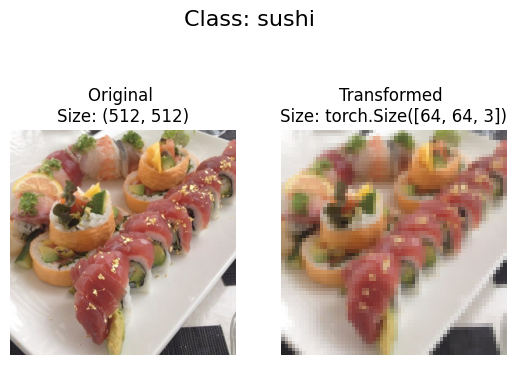

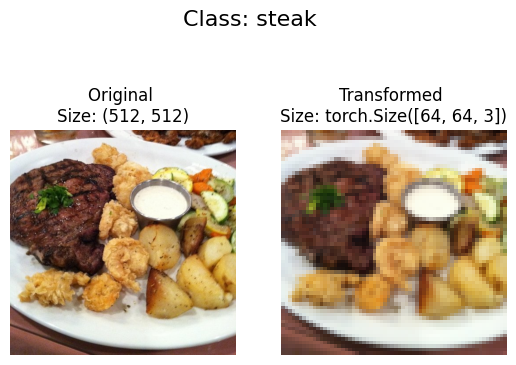

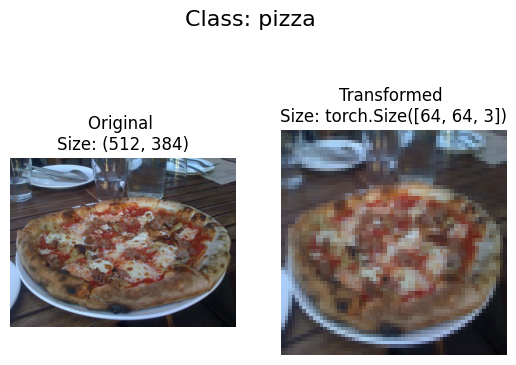

In [14]:
from matplotlib import pyplot as plt
def image_transform(image_path, transforms, n = 3, seed = None):

  random.seed(seed)
  random_image_paths = random.sample(image_path_list, k=n)
  for image_path in random_image_paths:

    with Image.open(image_path) as f:

      fig, ax = plt.subplots(1, 2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original \nSize: {f.size}")
      ax[0].axis("off")

      # Transform and plot image
      # Note: permute() will change shape of image to suit matplotlib
      # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
      transformed_image = transforms(f).permute(1, 2, 0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

image_transform(image_path_list,
                        transforms= simple_transform ,
                        n=3,
                        seed = None)

In [15]:
# data loader for simple data

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset= train_data_simple,
                               batch_size = BATCH_SIZE,
                               shuffle=True,
                               num_workers=2
)

test_dataloader = DataLoader(dataset = test_data_simple,
                              batch_size = BATCH_SIZE,
                              shuffle=False,
                              num_workers=2

)

In [16]:
# data loader for augmented data data

BATCH_SIZE = 32

train_dataloader_aug = DataLoader(dataset= train_data_aug,
                               batch_size = BATCH_SIZE,
                               shuffle=True,
                               num_workers=2
)

test_dataloader_aug = DataLoader(dataset = test_data_aug,
                              batch_size = BATCH_SIZE,
                              shuffle=False,
                              num_workers=2

)

In [17]:
from torch import nn
class TinyGG(nn.Module):
  def __init__(self, in_layer, hidden, out_layer) -> None:
      super().__init__()
      self.cov_block_1 = nn.Sequential(
          nn.Conv2d(in_channels = in_layer,
                    out_channels = hidden,
                    kernel_size = 3,
                    stride = 1,
                    padding = 1),
          nn.ReLU(),
          nn.Conv2d(in_channels = hidden,
                    out_channels = hidden,
                    kernel_size = 3,
                    stride = 1,
                    padding = 1),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size = 2,
                       stride=2 )
      )

      self.cov_block_2 = nn.Sequential(
          nn.Conv2d(in_channels = hidden,
                    out_channels = hidden,
                    kernel_size = 3,
                    stride = 1,
                    padding = 1),
          nn.ReLU(),
          nn.Conv2d(in_channels = hidden,
                    out_channels = hidden,
                    kernel_size = 3,
                    stride = 1,
                    padding = 1),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size = 2)
      )
      self.classifier = nn.Sequential(
          nn.Flatten(),
          nn.Linear(in_features = hidden * 16 * 16,
                    out_features = out_layer)
      )
  def forward(self, x):
    x = self.cov_block_1(x)
    #print(x.shape)
    x = self.cov_block_2(x)
    #print(x.shape)
    x = self.classifier(x)
    #print(x.shape)
    return x

torch.manual_seed(42)
model_1 = TinyGG(in_layer = 3, hidden = 10, out_layer = 3)
model_1


TinyGG(
  (cov_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (cov_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [18]:
image_batch, label_batch = next(iter(train_dataloader))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [19]:
model_1(image_batch)

tensor([[0.0578, 0.0634, 0.0351],
        [0.0657, 0.0650, 0.0398],
        [0.0702, 0.0678, 0.0412],
        [0.0687, 0.0646, 0.0417],
        [0.0625, 0.0613, 0.0355],
        [0.0587, 0.0595, 0.0358],
        [0.0634, 0.0637, 0.0376],
        [0.0653, 0.0615, 0.0376],
        [0.0678, 0.0621, 0.0349],
        [0.0620, 0.0599, 0.0371],
        [0.0607, 0.0628, 0.0387],
        [0.0638, 0.0589, 0.0352],
        [0.0658, 0.0611, 0.0369],
        [0.0703, 0.0689, 0.0330],
        [0.0557, 0.0571, 0.0356],
        [0.0632, 0.0642, 0.0388],
        [0.0639, 0.0616, 0.0375],
        [0.0605, 0.0600, 0.0374],
        [0.0623, 0.0627, 0.0368],
        [0.0740, 0.0676, 0.0400],
        [0.0621, 0.0613, 0.0361],
        [0.0632, 0.0599, 0.0366],
        [0.0662, 0.0627, 0.0334],
        [0.0637, 0.0622, 0.0394],
        [0.0670, 0.0666, 0.0363],
        [0.0650, 0.0601, 0.0405],
        [0.0639, 0.0597, 0.0395],
        [0.0733, 0.0687, 0.0412],
        [0.0697, 0.0631, 0.0402],
        [0.062

In [20]:
16*16*10

2560

In [21]:
pip install torchinfo

In [22]:
from torchinfo import summary
summary(model_1, input_size = (32, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
TinyGG                                   [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 32, 32]          --
│    └─Conv2d: 2-1                       [32, 10, 64, 64]          280
│    └─ReLU: 2-2                         [32, 10, 64, 64]          --
│    └─Conv2d: 2-3                       [32, 10, 64, 64]          910
│    └─ReLU: 2-4                         [32, 10, 64, 64]          --
│    └─MaxPool2d: 2-5                    [32, 10, 32, 32]          --
├─Sequential: 1-2                        [32, 10, 16, 16]          --
│    └─Conv2d: 2-6                       [32, 10, 32, 32]          910
│    └─ReLU: 2-7                         [32, 10, 32, 32]          --
│    └─Conv2d: 2-8                       [32, 10, 32, 32]          910
│    └─ReLU: 2-9                         [32, 10, 32, 32]          --
│    └─MaxPool2d: 2-10                   [32, 10, 16, 16]          --
├─Sequentia

In [23]:
#train step function

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
  model.train()
  train_loss, train_acc = 0, 0

  for batch, (X,y) in enumerate(dataloader):
    X, y = X, y

    #forward pass

    y_pred = model_1(X)

    #calculate the loss

    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    #optimizer zero grag

    optimizer.zero_grad()

    #backpropagation

    loss.backward()

    #optimizer

    optimizer.step()

    #calculate accuracy metric

    y_pred_class = torch.argmax(torch.softmax(y_pred, dim = 1), dim = 1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  train_loss /= len(dataloader)
  train_acc /= len(dataloader)

  return train_loss, train_acc

In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):

  model_1.eval()

  test_loss, test_acc = 0, 0

  with torch.inference_mode():
    for batch, (X,y) in enumerate(dataloader):
      X, y = X, y

      #forward pass
      test_pred = model_1(X)

      #calculate the loss
      loss = loss_fn(test_pred, y)
      test_loss += loss.item()

      #calculate the accuracy
      test_pred_class = test_pred.argmax(dim = 1)
      test_acc += (test_pred_class == y).sum().item()/len(test_pred)

  test_loss /= len(dataloader)
  test_acc /= len(dataloader)

  return test_loss, test_acc



In [ ]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs = 5):

  result = {"train_loss": [],
            "train_acc": [],
            "test_loss": [],
            "test_acc": []}


  for epoch in range(epochs):
    print(f"Epoch: {epoch}\n---------")
    train_loss, train_acc = train_step(model = model,
                                       dataloader = train_dataloader,
                                       loss_fn = loss_fn,
                                       optimizer = optimizer)

    test_loss, test_acc = test_step(model = model,
                                    dataloader = test_dataloader,
                                    loss_fn = loss_fn)

    print(f"Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

    result["train_loss"].append(train_loss)
    result["train_acc"].append(train_acc)
    result["test_loss"].append(test_loss)
    result["test_acc"].append(test_acc)

  return result

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [ ]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 10

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_1.parameters(),
                             lr = 0.001)


from timeit import default_timer as timer
start_time = timer()

model_1_results = train(model = model_1,
                        train_dataloader = train_dataloader,
                        test_dataloader = test_dataloader,
                        optimizer = optimizer,
                        loss_fn = loss_fn,
                        epochs = NUM_EPOCHS)

end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")


Epoch: 0
---------
Train loss: 1.1071 | Train acc: 0.2500 | Test loss: 1.1061 | Test acc: 0.2604
Epoch: 1
---------
Train loss: 1.0784 | Train acc: 0.4258 | Test loss: 1.1396 | Test acc: 0.2604
Epoch: 2
---------
Train loss: 1.0804 | Train acc: 0.4258 | Test loss: 1.1698 | Test acc: 0.2604
Epoch: 3
---------
Train loss: 1.1282 | Train acc: 0.3047 | Test loss: 1.1594 | Test acc: 0.2604
Epoch: 4
---------
Train loss: 1.0889 | Train acc: 0.4258 | Test loss: 1.1443 | Test acc: 0.2604
Epoch: 5
---------
Train loss: 1.0962 | Train acc: 0.3047 | Test loss: 1.1456 | Test acc: 0.2604
Epoch: 6
---------
Train loss: 1.0850 | Train acc: 0.4336 | Test loss: 1.1422 | Test acc: 0.1979
Epoch: 7
---------
Train loss: 1.0954 | Train acc: 0.2930 | Test loss: 1.1466 | Test acc: 0.1979
Epoch: 8
---------
Train loss: 1.0872 | Train acc: 0.3711 | Test loss: 1.1109 | Test acc: 0.3210
Epoch: 9
---------
Train loss: 1.0353 | Train acc: 0.4727 | Test loss: 1.0373 | Test acc: 0.5256
Total training time: 33.498 se

In [ ]:
# Check the model_0_results keys
model_1_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [ ]:
model_1_results

{'train_loss': [1.1071179807186127,
  1.0784028097987175,
  1.0804155096411705,
  1.1282186210155487,
  1.0888646095991135,
  1.0962431281805038,
  1.084994524717331,
  1.0954414159059525,
  1.0872374325990677,
  1.0353049635887146],
 'train_acc': [0.25,
  0.42578125,
  0.42578125,
  0.3046875,
  0.42578125,
  0.3046875,
  0.43359375,
  0.29296875,
  0.37109375,
  0.47265625],
 'test_loss': [1.1061032613118489,
  1.1395694017410278,
  1.1697556575139363,
  1.1593709389368694,
  1.1443432172139485,
  1.1455913384755452,
  1.1421730518341064,
  1.1465973059336345,
  1.1109294891357422,
  1.0373396277427673],
 'test_acc': [0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.19791666666666666,
  0.19791666666666666,
  0.3210227272727273,
  0.5255681818181818]}

In [ ]:
from typing import Dict, List

def plot_loss_curves(results: Dict[str, List[float]]):

   # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();



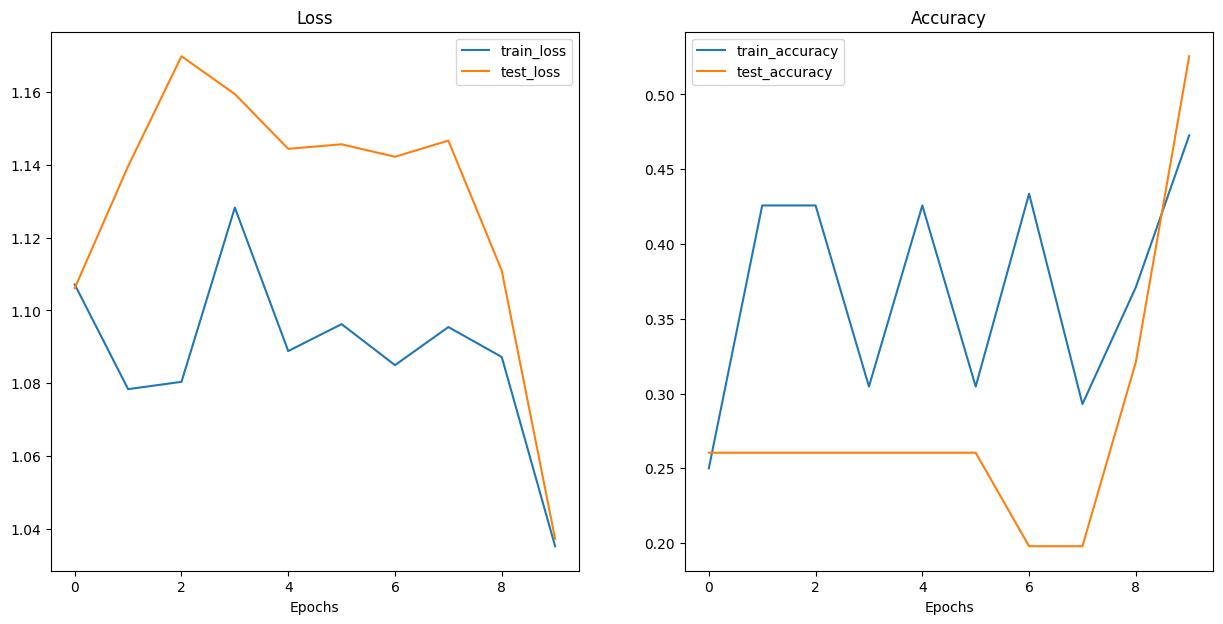

In [ ]:
plot_loss_curves(model_1_results)

In [ ]:
#Train the same model with augmented data

torch.manual_seed(42)
model_2 = TinyGG(in_layer = 3, hidden = 10, out_layer = 3)
model_2

TinyGG(
  (cov_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (cov_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [ ]:
torch.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 10

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_1.parameters(),
                             lr = 0.001)


from timeit import default_timer as timer
start_time = timer()

model_2_results = train(model = model_2,
                        train_dataloader = train_dataloader_aug,
                        test_dataloader = test_dataloader,
                        optimizer = optimizer,
                        loss_fn = loss_fn,
                        epochs = NUM_EPOCHS)

end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

Epoch: 0
---------
Train loss: 1.0325 | Train acc: 0.5430 | Test loss: 1.1012 | Test acc: 0.3229
Epoch: 1
---------
Train loss: 1.0504 | Train acc: 0.3789 | Test loss: 1.1328 | Test acc: 0.3125
Epoch: 2
---------
Train loss: 0.9447 | Train acc: 0.5312 | Test loss: 1.1182 | Test acc: 0.3229
Epoch: 3
---------
Train loss: 0.9767 | Train acc: 0.5742 | Test loss: 1.0563 | Test acc: 0.3314
Epoch: 4
---------
Train loss: 0.9506 | Train acc: 0.5938 | Test loss: 1.0302 | Test acc: 0.3930
Epoch: 5
---------
Train loss: 0.9679 | Train acc: 0.4492 | Test loss: 1.0554 | Test acc: 0.3428
Epoch: 6
---------
Train loss: 0.8605 | Train acc: 0.5781 | Test loss: 1.0146 | Test acc: 0.4242
Epoch: 7
---------
Train loss: 0.9644 | Train acc: 0.5781 | Test loss: 1.0226 | Test acc: 0.3722
Epoch: 8
---------
Train loss: 1.0422 | Train acc: 0.4414 | Test loss: 1.0554 | Test acc: 0.3636
Epoch: 9
---------
Train loss: 0.9117 | Train acc: 0.5977 | Test loss: 0.9433 | Test acc: 0.4953
Total training time: 45.171 se

In [ ]:
model_2_results

{'train_loss': [1.0324828177690506,
  1.0504471063613892,
  0.944658100605011,
  0.9766559526324272,
  0.9505974799394608,
  0.9679291918873787,
  0.8605411611497402,
  0.9643979296088219,
  1.0421585962176323,
  0.9117278382182121],
 'train_acc': [0.54296875,
  0.37890625,
  0.53125,
  0.57421875,
  0.59375,
  0.44921875,
  0.578125,
  0.578125,
  0.44140625,
  0.59765625],
 'test_loss': [1.1012381712595622,
  1.1327910621960957,
  1.1181618769963582,
  1.0562671621640523,
  1.030168851216634,
  1.0553688804308574,
  1.01456085840861,
  1.0225523312886555,
  1.055371085802714,
  0.9433018962542216],
 'test_acc': [0.3229166666666667,
  0.3125,
  0.3229166666666667,
  0.331439393939394,
  0.39299242424242425,
  0.3428030303030303,
  0.42424242424242425,
  0.3721590909090909,
  0.3636363636363636,
  0.49526515151515155]}

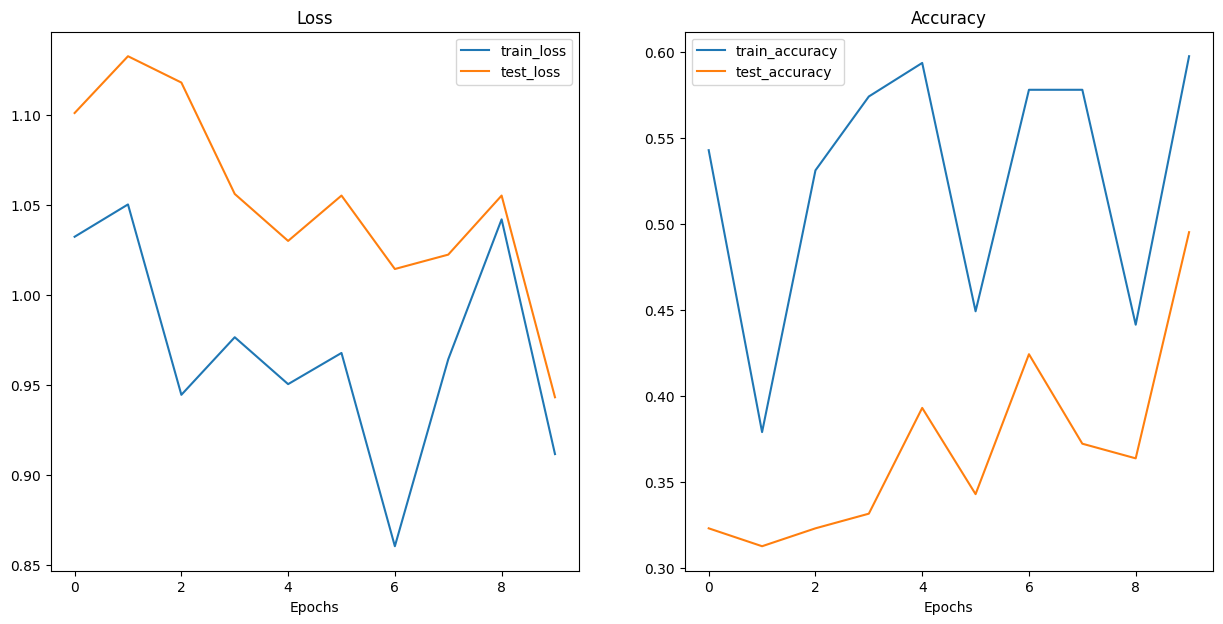

In [ ]:
plot_loss_curves(model_2_results)

In [ ]:
# compare two models
import pandas as pd

model_1_df = pd.DataFrame(model_1_results)
model_2_df = pd.DataFrame(model_2_results)
model_1_df.head()

,train_loss,train_acc,test_loss,test_acc
0,1.107118,0.250000,1.106103,0.260417
1,1.078403,0.425781,1.139569,0.260417
2,1.080416,0.425781,1.169756,0.260417
3,1.128219,0.304688,1.159371,0.260417
4,1.088865,0.425781,1.144343,0.260417


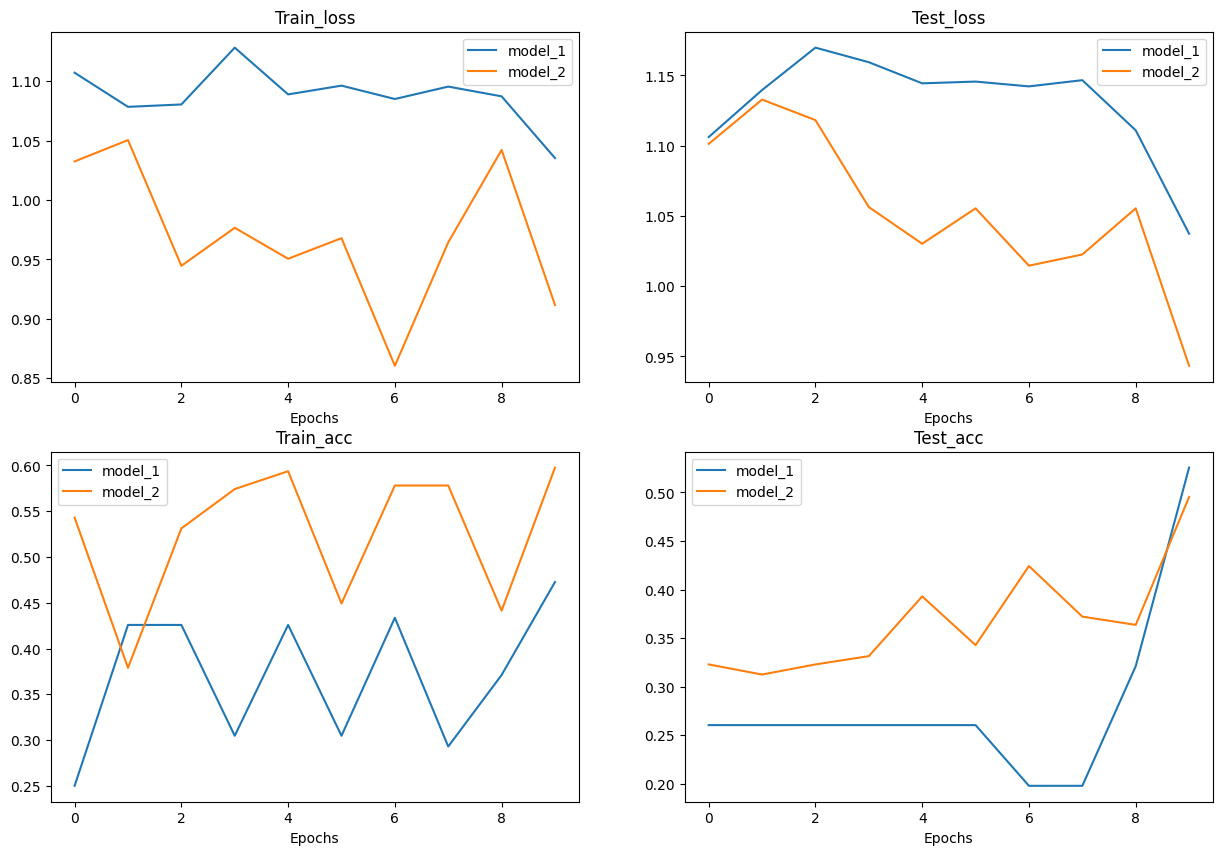

In [ ]:
plt.figure(figsize=(15, 10))

#get number of epochs
epochs = range(len(model_1_df))

#train
plt.subplot(2 , 2, 1)
plt.plot(epochs, model_1_df['train_loss'], label='model_1')
plt.plot(epochs, model_2_df['train_loss'], label='model_2')
plt.title('Train_loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(2 , 2, 2)
plt.plot(epochs, model_1_df['test_loss'], label='model_1')
plt.plot(epochs, model_2_df['test_loss'], label='model_2')
plt.title('Test_loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(2 , 2, 3)
plt.plot(epochs, model_1_df['train_acc'], label='model_1')
plt.plot(epochs, model_2_df['train_acc'], label='model_2')
plt.title('Train_acc')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(2 , 2, 4)
plt.plot(epochs, model_1_df['test_acc'], label='model_1')
plt.plot(epochs, model_2_df['test_acc'], label='model_2')
plt.title('Test_acc')
plt.xlabel('Epochs')
plt.legend();

In [ ]:
#predict image

import urllib.request

# URL of the image
image_url = "https://tse3.mm.bing.net/th?id=OIP.Kd_1IUXSV0xeSGhM5ud0JwHaFj&pid=Api&P=0&h=180"

# Download the image
image_path = "sushi.jpg"
urllib.request.urlretrieve(image_url, image_path)

print(f"Image downloaded to: {image_path}")


Image downloaded to: sushi.jpg


In [ ]:
import torchvision
from torchvision import transforms
from PIL import Image

# Function to read and process the image
def load_image(img_path):
    # Load the image using torchvision.io.read_image (returns a tensor in the range [0, 255])
    image = torchvision.io.read_image(img_path).to(torch.float32)  # Convert to float32
    image = image / 255.0  # Normalize to [0, 1]
    return image

# Define the transformation (resize to 64x64)
image_transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize the image
    transforms.ToTensor()  # Convert the image to a tensor
])

# Apply the transformation
def transform_image(img_path):
    # Load the image
    image = load_image(img_path)

    # Convert the image to PIL for transformation
    pil_image = transforms.ToPILImage()(image)  # Convert tensor to PIL image

    # Apply the resize transformation
    transformed_image = image_transform(pil_image)

    return transformed_image

# Define the image path
pred_image_path = "/content/data/test/sushi/2741434.jpg"

# Transform the image
transformed_image = transform_image(pred_image_path)
print(f"Transformed image shape: {transformed_image.shape}")

# Assuming the model is correctly defined and loaded
model_1.eval()  # Set the model to evaluation mode

# Run inference
with torch.inference_mode():
    pred = model_1(transformed_image.unsqueeze(dim=0))  # Add batch dimension
    result = torch.argmax(torch.softmax(pred, dim=1), dim=1)

# Print the predictions
print(pred)
print(result)


Transformed image shape: torch.Size([3, 64, 64])
tensor([[-0.1204, -0.4889,  0.0534]])
tensor([2])


Transformed image shape: torch.Size([3, 64, 64])
tensor([[ 0.3191, -0.6066, -0.1595]])
tensor([[0.4961, 0.1966, 0.3074]])
tensor([0])


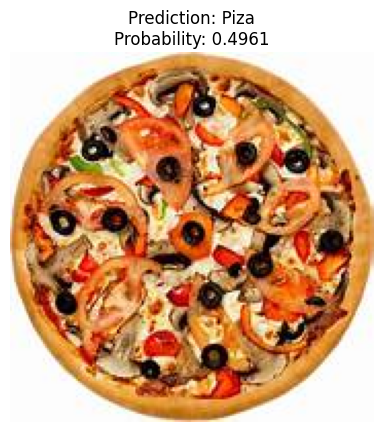

In [ ]:
import torch
import torchvision
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Function to read and process the image
def load_image(img_path):
    # Load the image using torchvision.io.read_image (returns a tensor in the range [0, 255])
    image = torchvision.io.read_image(img_path).to(torch.float32)  # Convert to float32
    image = image / 255.0  # Normalize to [0, 1]
    return image

# Define the transformation (resize to 64x64)
image_transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize the image
    transforms.ToTensor()  # Convert the image to a tensor
])

# Apply the transformation
def transform_image(img_path):
    # Load the image
    image = load_image(img_path)

    # Convert the image to PIL for transformation
    pil_image = transforms.ToPILImage()(image)  # Convert tensor to PIL image

    # Apply the resize transformation
    transformed_image = image_transform(pil_image)

    return transformed_image

# Define the image path
pred_image_path = "pizza.jpg"

# Transform the image
transformed_image = transform_image(pred_image_path)
print(f"Transformed image shape: {transformed_image.shape}")

# Assuming the model is correctly defined and loaded
model_1.eval()  # Set the model to evaluation mode

# Run inference
with torch.inference_mode():
    pred = model_1(transformed_image.unsqueeze(dim=0))  # Add batch dimension
    result_1 = torch.softmax(pred, dim=1)
    result = torch.argmax(torch.softmax(pred, dim=1), dim=1)

# Print the predictions
print(pred)
print(result_1)
print(result)

# Get the class labels (assuming you have a class-to-label mapping)
class_names = ['Piza', 'steak', 'sushi']

# Get predicted class name and probability
pred_class = class_names[result.item()]
pred_prob = torch.softmax(pred, dim=1).max().item()

# Display the image
image_to_show = Image.open(pred_image_path)
plt.imshow(image_to_show)
plt.axis('off')  # Hide axes
plt.title(f"Prediction: {pred_class}\nProbability: {pred_prob:.4f}")
plt.show()
